<a href="https://colab.research.google.com/github/abbasyousaf13/Student-Placement-ML-Project/blob/main/Student_Placement_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
# steps
# 1 - Preprocess + EDA + Feature Selection
# 2 - Extract input and output cols
# 3 - Scale the values
# 4 - Train test split
# 5 - Train your model
# 6 - Evaluate the model / model selection
# 7 - Deploy the model

Step-1       Preprocess + EDA + Feature Selection

In [6]:
# preprocessing
df = df.iloc[:, 1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [7]:
# EDA
import matplotlib.pyplot as plt

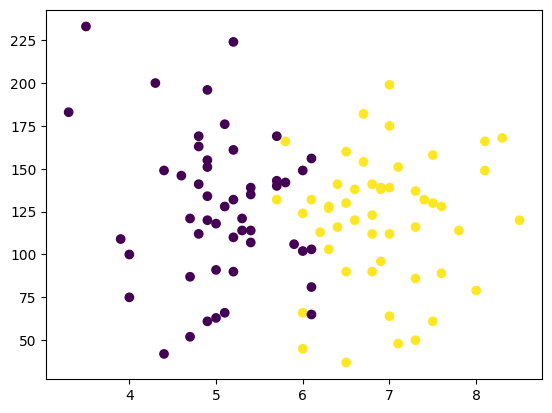

In [9]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

# Now what we've to do is to develop machine learning model which will understand the data inside this pattern

Step-2      Extract input and output cols

In [10]:
x = df.iloc[:, 0:2]            # put independant columns in it
y = df.iloc[:, -1]            # put dependant columns in it

In [11]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
x.shape           # this is a 2D denser

(100, 2)

In [12]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [14]:
y.shape   # this is a 1D denser

(100,)

Step-3     Train test split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

# 1st split is X of training set
# 2nd split is X of test set
# 3rd split is y of training
# 4th split is y of test set

In [18]:
X_train

,cgpa,iq
44,7.5,61.0
24,4.7,121.0
27,6.0,124.0
51,4.8,141.0
89,4.9,151.0
...,...,...
71,6.1,132.0
61,7.3,137.0
69,8.5,120.0
36,5.7,140.0


In [19]:
y_train

44    1
24    0
27    1
51    0
89    0
     ..
71    1
61    1
69    1
36    0
80    0
Name: placement, Length: 90, dtype: int64

In [21]:
X_test

,cgpa,iq
18,4.0,100.0
79,6.5,90.0
94,4.7,52.0
15,5.1,176.0
52,7.0,175.0
70,6.3,127.0
33,6.0,149.0
20,6.6,120.0
38,6.5,160.0
53,8.3,168.0


In [22]:
y_test

18    0
79    1
94    0
15    0
52    1
70    1
33    0
20    1
38    1
53    1
Name: placement, dtype: int64

Step-4   Scaling the values

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
# create an object of this class
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)   # it'll first understand what is inside the data and then convert it

In [26]:
X_train    # now all the values will be in the range from -1 to +1

array([[ 1.34151939, -1.55432223],
       [-1.12789541, -0.04228115],
       [ 0.0186186 ,  0.03332091],
       [-1.03970203,  0.46173254],
       [-0.95150864,  0.71373939],
       [-0.95150864,  0.28532775],
       [ 1.87067971,  1.09174966],
       [ 0.45958553, -2.15913866],
       [ 0.98874585,  0.71373939],
       [-0.51054171,  0.41133117],
       [-1.2160888 ,  0.58773597],
       [-0.86331526, -0.79830169],
       [ 0.10681199, -0.49589347],
       [-0.15776817,  1.09174966],
       [-1.39247557,  0.66333802],
       [-0.24596155,  0.51213391],
       [ 0.19500538, -0.24388663],
       [-1.8334425 , -0.34468936],
       [ 1.16513262, -0.16828457],
       [ 1.87067971,  0.66333802],
       [ 1.16513262, -0.92430511],
       [-1.39247557, -2.03313524],
       [ 1.34151939,  0.18452501],
       [-0.24596155,  0.23492638],
       [ 1.78248632, -1.1007099 ],
       [ 0.72416569,  0.46173254],
       [-1.12789541, -0.89910443],
       [ 0.98874585, -1.88193113],
       [-0.68692848,

In [27]:
X_test = scaler.transform(X_test)   # We'll use transform this time as we already underdsatnf pattern during training time

In [28]:
X_test

array([[-1.74524912, -0.57149553],
       [ 0.45958553, -0.82350237],
       [-1.12789541, -1.78112839],
       [-0.77512187,  1.34375651],
       [ 0.90055246,  1.31855582],
       [ 0.28319876,  0.10892296],
       [ 0.0186186 ,  0.66333802],
       [ 0.54777892, -0.06748183],
       [ 0.45958553,  0.94054555],
       [ 2.04706648,  1.14215103]])

Step-5     Train your model

In [29]:
# we've decided to use logistic regression while doing EDA
from sklearn.linear_model import LogisticRegression

In [33]:
clf = LogisticRegression()

In [34]:
# model training
clf.fit(X_train, y_train)

LogisticRegression()

Step-6  Model Evaluation

In [38]:
# In this step we only just get accuracy on the test data
y_pred = clf.predict(X_test)          # it has all the input data of the hidden students
# now below it will show the output of model prediction
y_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1])

In [39]:
y_test    # this is the output of actual result whether placement done or not

18    0
79    1
94    0
15    0
52    1
70    1
33    0
20    1
38    1
53    1
Name: placement, dtype: int64

In [40]:
# check accuracy as how much correct predictions are done by my model
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test, y_pred)  # just provide actual data and predictive data

1.0

In [45]:
# plotting the decision boundary
# Decision Boundary is a visualization technique in which we can see what pattern machine learning model noticed in our data
from mlxtend.plotting import plot_decision_regions

<Axes: >

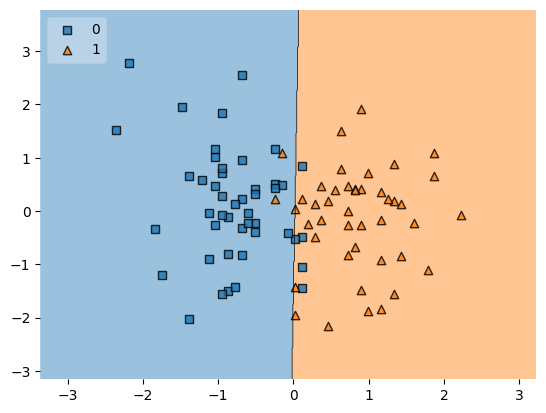

In [46]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)